[Python图像处理之scikit-image基本用法](https://blog.csdn.net/u012300744/article/details/80083282)

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib notebook

In [40]:
# img = io.imread('E:\Python\ML - DL\PyTorch\data\cat.jpg')
# print(img.shape)

# plt.imshow(img)
# plt.show()

本文介绍Python语言用于数字图像处理，那么要使用python进行各种开发和科学计算，需要对应相对的python包，

python有很多的数字图像处理相关的包，像
- PIL
- Pillow
- OpenCV
- scikit-image
- 等等

其中PIL和Pillow只提供最基础的数字图像处理，功能有限；

opencv实际上是一个c++库，只是提供了python接口，

scikit-image是基于scipy的一款图像处理包，它将图片作为numpy数组进行处理，正好与matlab一样，因此，我们最终选择scikit-image进行数字图像处理。

## skimage 库子模块介绍

`skimage`库的全称`scikit-image`， 是对`scipy.ndimage`进行了扩展，提供了更多的图片处理功能。`skimage`包含很多的子模块，各个子模块具有不同的功能，如下

|子模块名称|实现功能|
|-|-|
|io|读取，保存和显示图片和视频|
|color|颜色空间变换|
|data |	提供一些测试图片和样本数据
|filters |	图像增强，边缘检测，排序滤波器，自动阈值等
|draw |	操作于numpy数组上的基本图形绘制，包括线条，矩阵，圆和文本等
|transform |	几何变换和其他变换，如旋转，拉伸和Radon(拉东)变换等
|exposure |	图像强度调整，例如，直方图均衡化等
|feature |	特征检测和提取， 例如，纹理分析等
|graph |	图论操作，例如，最短路径
|measure |	图像属性测量，例如，相似度和轮廓
|morphology |	形态学操作，如开闭运算，骨架提取等
|novice |	简化的用于教学目的的接口
|restoration |	修复算法，例如去卷积算法，去噪等
|segmentation |	图像分割为多个区域
|util |	通用工具
|viewer |	简单图形用户界面用于可视化结果和探索参数


## skimage 操作
### 图像读取，保存与显示
skimage中io子模块提供了相关的功能，同时也提供了一些data模块，其中包含一些示例图片用于练习

### 从外部读取图片并显示
> skimage.io.imread(fname) 读取fname指定的图片  
> skimage.io.imshow(arr)， 表示显示arr数组表示的图片

In [41]:
from skimage import io

<IPython.core.display.Javascript object>


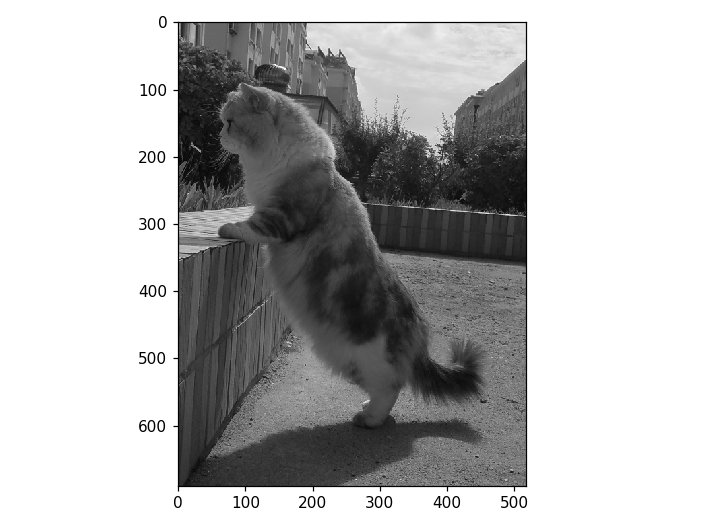

In [42]:
img = io.imread('E:\Python\ML - DL\PyTorch\data\cat.jpg')
io.imshow(img)
io.show()

读取单张`灰度`图片时，使用 `skimage.io.imread(fname, as_grey=True)` 函数，第一个参数fname表示要显示的图片路径，第二个参数`as_grey`，是bool类型，默认值False。

<IPython.core.display.Javascript object>


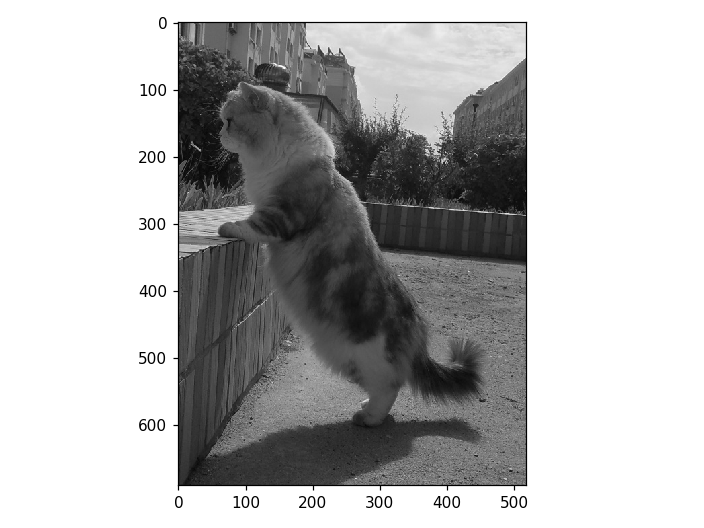

In [45]:
plt.figure()
path = "E:\Python\ML - DL\PyTorch\data\cat.jpg"
img = io.imread(path, as_gray=True)
io.imshow(img)
io.show()

### skimage 自带图片 

|图片名称| 	说明
|-|-|
|astronaut |	宇航员
|binary_blobs| 	二元斑点
|camera |	相机
|checkerboard ||	棋盘
|chelsea |	猫
|clock |	时钟
|coffee |	一杯咖啡
|coins |	硬币
|horse |	马
|hubble_deep_field |	星空
|immunohistochemistry |	结肠图片
|logo |	商标
|moon |	月球表面
|page |	书页内容
|rocket |	火箭
|text |	文字图片


In [46]:
from skimage import io, data

<IPython.core.display.Javascript object>


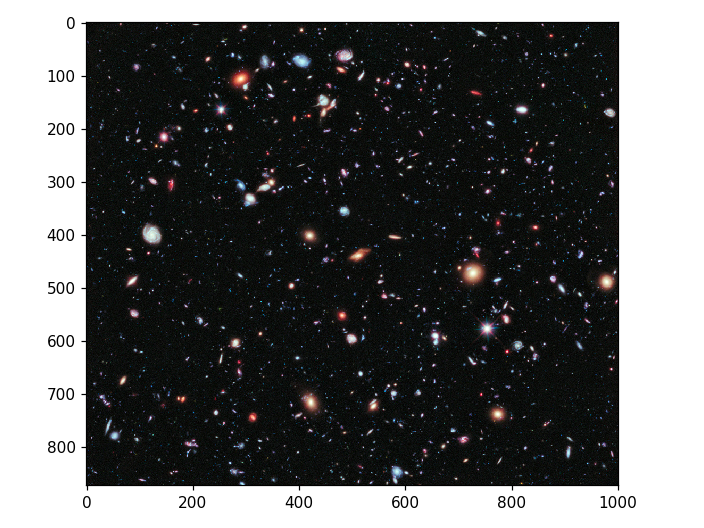

In [48]:
plt.figure()
img = data.hubble_deep_field()
io.imshow(img)
io.show()

In [52]:
# 注：这些图片存储在skimage的安装目录下，可以通过data_dir把路径打印出来。

from skimage import data_dir

print(data_dir)

D:\ProgramData\Anaconda3\lib\site-packages\skimage\data


### 保存图片
使用 io.imsave(fname, arr) 函数进行保存,

- 参数fname: 表示保存的路径和名称
- 参数arr：表示需要保存的数组变量


In [53]:
from skimage import io, data

> 注：保存图片同时也起到了转换格式的作用，若读取的是png格式图片，当保存为jpg时，则图片从png格式转换为jpg格式图片。

<IPython.core.display.Javascript object>


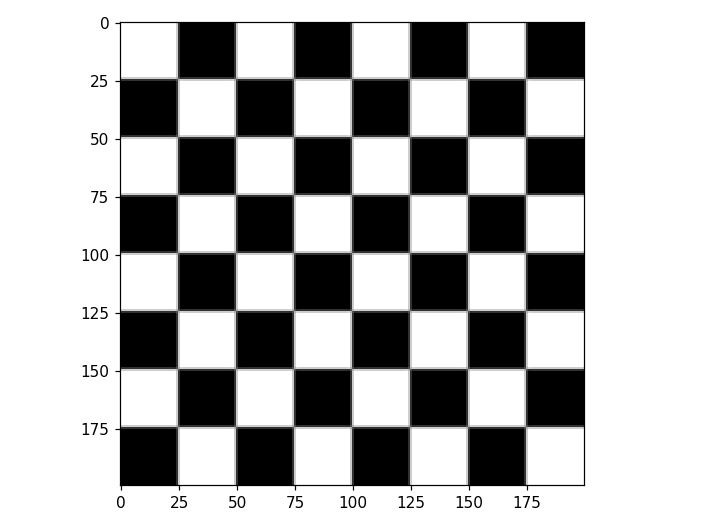

In [59]:
plt.figure()
img = data.checkerboard()
io.imshow(img)
io.imsave("checkerboard_copy.jpg", img)

### 获取图片信息

In [57]:
from skimage import io, data

<IPython.core.display.Javascript object>


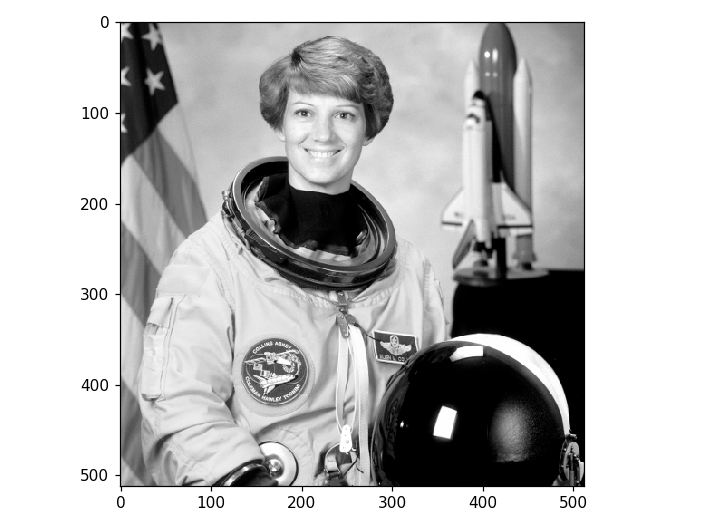

type(img): <class 'numpy.ndarray'>
img.shape: (300, 451, 3)
img.shape[0]: 300
img.shape[1]: 300
img.shape[2]: 300
img.size: 405900
img.max(): 231
img.min(): 0
img.mean(): 115.30514166050752


In [67]:
plt.figure()
img = data.chelsea()
io.imshow(img)
io.show()

print(f"type(img): {type(img)}")     # 类型
print(f"img.shape: {img.shape}")     # 形状
print(f"img.shape[0]: {img.shape[0]}")  # 图片宽度
print(f"img.shape[1]: {img.shape[0]}")  # 图片高度
print(f"img.shape[2]: {img.shape[0]}")  # 图片通道数
print(f"img.size: {img.size}")      # 显示总像素个数
print(f"img.max(): {img.max()}")     # 最大像素值
print(f"img.min(): {img.min()}")     # 最小像素值
print(f"img.mean(): {img.mean()}")    # 像素平均值

## 图像像素访问与裁剪
图片读入程序后，以numpy数组方式存储，因此对numpy数组的操作，都可以用于图片数组，对数组元素的访问，实际上就是对图片像素点的访问。
### 像素读取
对**彩色图片**的像素点访问方式如下
> img\[i, j, c\]

其中：
- i 表示图片的行数
- j 表示图片的列数 
- c 表示图片的通道数(RGB三通道分别对应0, 1, 2)。

坐标从左上角开始
对**灰度图片**的像素点访问方式如下
> gray\[i, j\]

In [68]:
# 例如， 对data中宇航员图片的B通道中的第20行10列的像素值

from skimage import io, data

In [70]:
img = data.astronaut()
pixel = img[20, 10, 2]  # 取 B 通道中第20行10列的像素值
print(pixel)

69


<IPython.core.display.Javascript object>


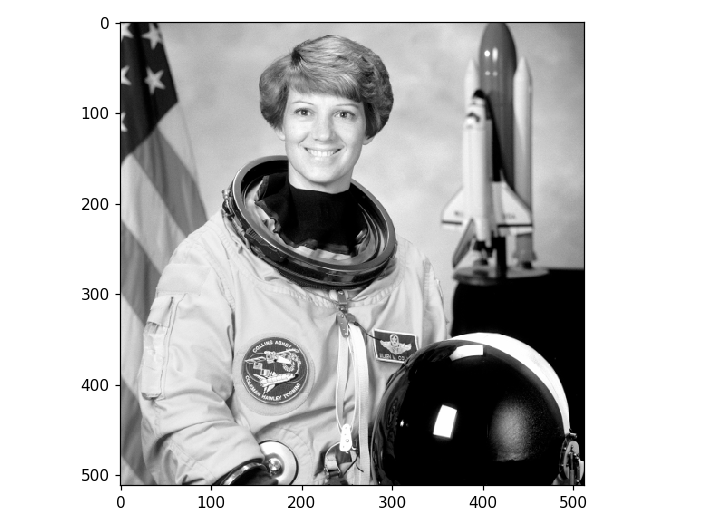

In [75]:
# 显示红色单通道图片

plt.figure()
img = data.astronaut()
R = img[ :, :, 0]
io.imshow(R)

### 像素修改
例如，对宇航员图片随机添加椒盐噪声

此处，使用numpy中的random来产生随机数， randint(0, cols)表示随机生成一个整数， 范围在0到cols之间。

<IPython.core.display.Javascript object>


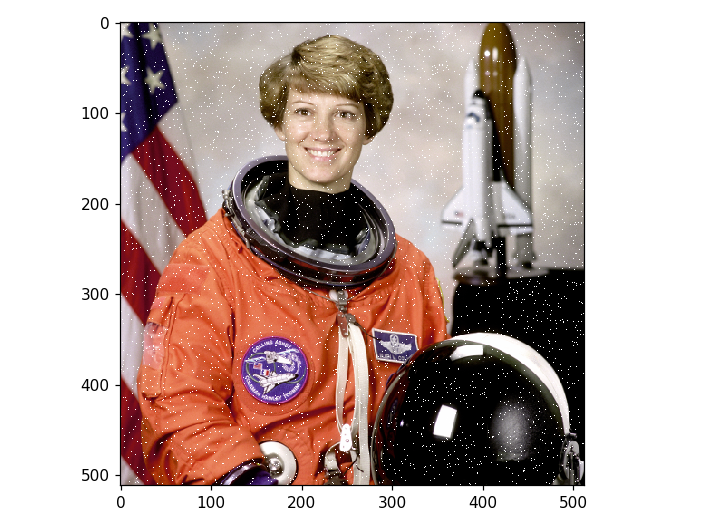

In [80]:
import numpy as np
from skimage import io, data

img = data.astronaut()

# 随机生成5000个椒盐点
rows, cols, dims = img.shape

for i in range(5000):
    x = np.random.randint(0, rows)
    y = np.random.randint(0, cols)
    img[x, y, : ] = 255  # ????????

plt.figure()
io.imshow(img)
io.show()

### 图片剪裁
由于图片是以numpy数组进行存储，因此对于数组的裁剪，就是对图片的裁剪

例如，对宇航员图片进行裁剪

<IPython.core.display.Javascript object>


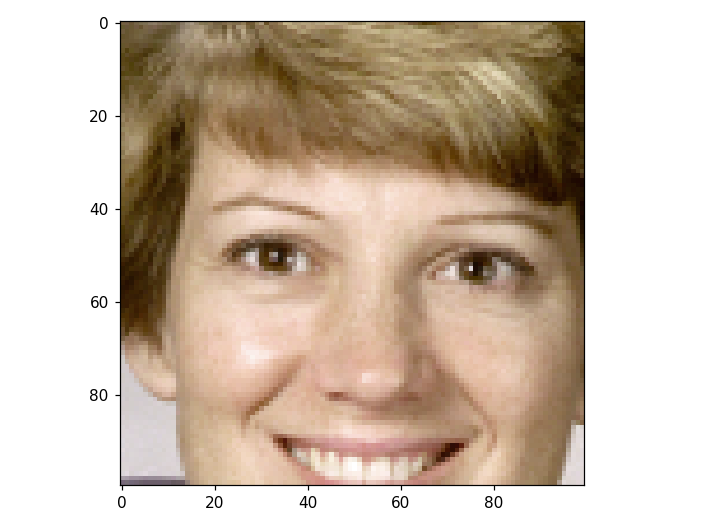

In [81]:
from skimage import io, data

plt.figure()
img = data.astronaut()
partial_img = img[50: 150, 170: 270, : ]
io.imshow(partial_img)
io.show()

对多个像素点进行操作时， 使用数组切片方式进行访问， 切片方式访问的是指定间隔内下标对应的像素点。以下是一些例子

In [84]:
# img[i, : ] = img[j, : ]  # 将第 j 行的数值赋值给第 i 行

# img[ :, i] = 100  # 将第 i 列的所有数值设为 100

# img[ : 100, : 50].sum()  # 计算前 100 行、前 50 列所有数值的和

# img[50: 100, 50:100]     # 50~100 行，50~100 列（不包括第 100 行和第 100 列）

# img[i].mean()    # 第 i 行所有数值的平均值

# img[ :, -1]  # 最后一列

# img[-2, :] or img[-2]  # 倒数第二行

以下是两个对图片的像素值进行访问和修改的例子

例1： 将宇航员图片进行二值化，像素值大于128的变为1, 否在变为0
>图像二值化（ Image Binarization）就是将图像上的像素点的灰度值设置为0或255，也就是将整个图像呈现出明显的黑白效果的过程。  
在数字图像处理中，二值图像占有非常重要的地位，图像的二值化使图像中数据量大为减少，从而能凸显出目标的轮廓

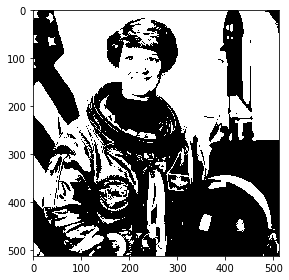

In [4]:
from skimage import io, data, color

img = data.astronaut()

img_gray = color.rgb2gray(img)
rows, cols = img_gray.shape

for i in range(rows):
    for j in range(cols):
        if img_gray[i, j] <= 0.5:
            img_gray[i, j] = 0
        else:
            img_gray[i, j] = 1

plt.figure()
io.imshow(img_gray)
io.show()

例2： 使用`color模块`的`rgb2gray()`函数，将彩色三通道图片转换为灰度图片，转换结果为float64类型的数组，范围在[0,1]之间

这个例子先对R通道的所有像素值进行判断，如果大于170，则将这个地方的像素值变为\[0,255,0\], 即G通道值为255，R和B通道值为0。

In [5]:
from skimage import io, data

[[False False False ... False False False]
 [ True False False ... False False False]
 [ True  True False ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]


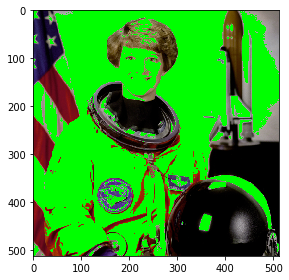

In [8]:
img = data.astronaut()

img_idx_modified = img[ : , : , 0] > 170
print(img_idx_modified)
img[img_idx_modified] = [0, 255, 0]

plt.figure()

io.imshow(img)

## 图像数据类型以及颜色空间转换
### 图像数据类型
在`skimage`中，一张图片以 numpy 数组形式存储，数组的数据类型有很多种，相互之间可以转换，数据类型以及取值范围如下表所示：

|数据类型| 	数值范围
|-|-|
|uint8 |	0 to 255
|uint16 |	0 to 65535
|uint32 |	0 to 232−1232−1
|float16 |	半精度浮点数：16位，正负号1位，指数5位，精度10位
|float32 |	单精度浮点数：32位，正负号1位，指数8位，精度23位
|float64 |	双精度浮点数：64位，正负号1位，指数11位，精度52位
|float |	-1 to 1 or 0 to 1
|int8 |	-128 to 127
|int16 |	-32768 to 32767
|int32 |	−231−231 to 232−1232−1


一张图片的像素值范围是\[0,255\], 因此默认类型是unit8, 可用如下代码查看数据类型：

In [9]:
from skimage import io, data

In [10]:
img = data.astronaut()

print(img.dtype.name)

uint8


在上面的表中，特别注意的是float类型，它的范围是\[-1,1\]或\[0,1\]之间。

一张彩色图片转换为灰度图后，它的类型就由unit8变成了float

**uint8 转为 float**

In [13]:
from skimage import data, img_as_float

img = data.astronaut()
print(img.dtype.name)

dst = img_as_float(img)
print(dst.dtype.name)

uint8
float64


**float 转为 uint8**
>float转为uint8,可能会造成数据损失，因此会有警告

In [14]:
from skimage import img_as_ubyte

img = np.array([0, 0.5, 1], dtype=float)
print(img.dtype.name)

dst = img_as_ubyte(img)
print(dst.dtype.name)

float64
uint8


D:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


除了如上两种转换以外，还有其他的一些类型转换，如下表:

|函数名|描述|
|-|-|
|img_as_float |	Convert to 64-bit floating point
|img_as_ubyte |	Convert to 8-bit uint
|img_as_uint |	Convert to 16-bit uint
|img_as_int |	Convert to 16-bit int


### 颜色空间及转换
除了直接转换可以改变数据类型外，还可以通过图像的颜色空间转换来改变数据类型。

常用的`颜色空间`有`灰度空间`、`rgb空间`、`hsv空间`和`cmyk空间`。颜色空间转换以后，图片类型都变成了float型。

所有的颜色空间转换函数，都放在skimage的`color模块`内

例1： RGB转为灰度图

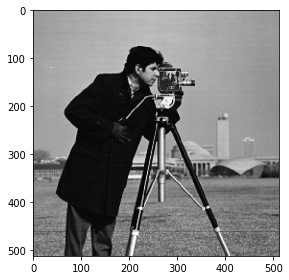

In [3]:
from skimage import io, data, color
plt.figure()

img = data.camera()
gray = color.rgb2gray(img)
io.imshow(gray)

其它的转换，用法都是一样的，列举常用的如下：

skimage.color.rgb2grey(rgb)

skimage.color.rgb2hsv(rgb)

skimage.color.rgb2lab(rgb)

skimage.color.gray2rgb(image)

skimage.color.hsv2rgb(hsv)

skimage.color.lab2rgb(lab)

实际上，上面的所有转换函数，都可以用一个函数来代替

skimage.color.convert_colorspace(arr, fromspace, tospace)

表示将arr从fromspace颜色空间转换到tospace颜色空间。


例2： RGB转为HSV

/home/liusy/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]


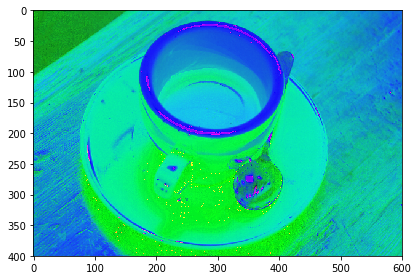

In [9]:
plt.figure()

img = data.coffee()
hsv = color.convert_colorspace(img, "RGB", "HSV")
io.imshow(hsv)

在color模块的颜色空间转换函数中，还有一个比较有用的函数是

`skimage.color.label2rgb(arr)`, 可以根据标签值对图片进行着色。以后的图片分类后着色就可以用这个函数。

例：将coffee图片分成三类，然后用默认颜色对三类进行着色

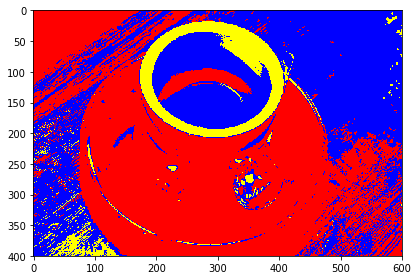

In [11]:
import numpy as np
from skimage import io, data, color
plt.figure()

img = data.coffee()
gray = color.rgb2gray(img)
rows, cols = gray.shape

labels = np.zeros([rows, cols])
for i in range(rows):
    for j in range(cols):
        if gray[i, j] < 0.4:
            labels[i, j] = 0
        elif gray[i, j] < 0.75:
            labels[i, j] = 1
        else:
            labels[i, j] = 2
    
dst = color.label2rgb(labels)

io.imshow(dst)